In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tqdm

In [4]:
torch.__version__

'1.5.0'

In [3]:
# # Create a simple LSTM model
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate=0.2):
#         super(LSTM, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers

#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.dropout = nn.Dropout(dropout_rate)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

#         out, _ = self.lstm(x, (h0, c0))
#         out = self.dropout(out[:, -1, :])  # Take only the output of the last time step
#         out = self.fc(out)
#         return out


In [7]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        out, (hn, cn) = self.lstm(x)#, (h0.detach(), c0.detach()))
#         out = self.fc(out[:, -1, :]) 
        out = self.fc(out) 
        return out

# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(LSTM, self).__init__()
#         self.hidden_dim = hidden_size
#         self.num_layers = num_layers
# #         self.lstm =  nn.D nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
# #         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
# #         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
# #         out, (hn, cn) = self.lstm(x)#, (h0.detach(), c0.detach()))
#         out = self.fc1(x)
# #         print('1',out)
# #         print('1',out.shape)
#         out = self.fc2(out) 
# #         print('2',out)
# #         print('2',out.shape)
#         return out

In [8]:
# Prepare data for training
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length:i+seq_length+1]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [9]:
df = pd.read_csv('../data/MNQ DEC23.Last-500-Volume-Action.txt')
df.head()

,date,open,high,low,close,vol,ft,action
0,2023-10-02 22:00:38,14992.00,14992.25,14986.50,14989.50,500,-0.342828,0
1,2023-10-02 22:03:41,14989.75,14992.50,14988.25,14990.50,500,-0.062081,0
2,2023-10-02 22:08:04,14991.00,14992.75,14989.50,14992.00,500,0.396141,0
3,2023-10-02 22:13:26,14992.00,14995.00,14987.75,14989.75,500,0.204056,0
4,2023-10-02 22:14:44,14989.75,14999.00,14989.75,14997.50,500,0.449363,0


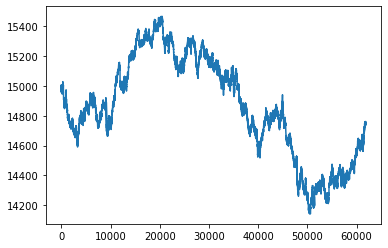

In [10]:
plt.plot(df['close'])
plt.show()

In [11]:
# Preprocess the data
# scaler = StandardScaler()
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(df[['close']].values)

In [12]:
seq_length = 10
X, y = create_sequences(prices_scaled, seq_length)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
y.shape

y[1]

y[0]=df['close'].values[53]

df['close'].values[0:52+0]

x[1][-1]

df['close'].values[0+1:52+1]

In [13]:
# Configure device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

weight = np.ones(seq_length)/np.array(range(1,seq_length+1))
weight = torch.FloatTensor(weight).to(device)
weight

plt.plot(weight.to('cpu'))


class weighted_MSELoss(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,inputs,targets,weights):
        return ((input - target)**2 ) * weight


weight=torch.FloatTensor([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

mse_criterion = weighted_MSELoss()
loss_mot_rec = mse_criterion(self.fake_noise,self.real_noise,weights).mean(dim = -1)

def weighted_mse_loss(input, target):
    
    return (weight * (input - target) ** 2)


?LSTM

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

for idx, (batch_X, batch_y) in enumerate(train_loader):
    print(idx)
    print(batch_X.shape)
    break

batch_X[0].reshape(-1),batch_X[1].reshape(-1)

In [14]:
# Hyperparameters
input_size = 1 # number of features
hidden_size = 50 #
num_layers = 2
output_size = 1
num_epochs = 50
learning_rate = 0.001
batch_size = 512

# Initialize model, loss function, and optimizer
model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size)
model.to(device)

# https://discuss.pytorch.org/t/how-to-implement-weighted-mean-square-error/2547/6
criterion = nn.MSELoss() # <<<
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [15]:
model

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

for idx, (train_index, test_index) in enumerate(tqdm.tqdm_notebook(tscv.split(X))):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    break

In [18]:
u_out = model.fc1(batch_X)

batch_X.shape

u_out.shape

u_out.shape

u_out[0]

u_out[:,-1,:]

model.fc2(u_out)

Epoch [10/50], Loss: 0.0041
Epoch [20/50], Loss: 0.0006
Epoch [30/50], Loss: 0.0004
Epoch [40/50], Loss: 0.0003
Epoch [50/50], Loss: 0.0002


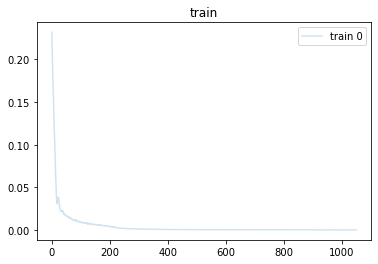

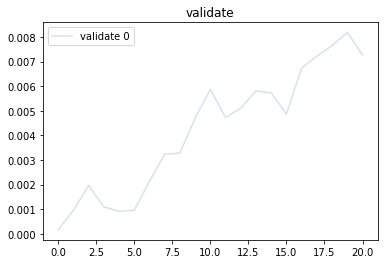

Epoch [10/50], Loss: 0.0013
Epoch [20/50], Loss: 0.0003
Epoch [30/50], Loss: 0.0001
Epoch [40/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000


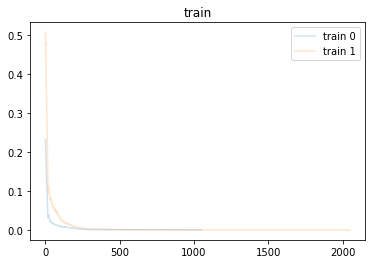

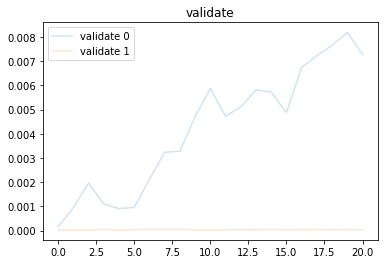

Epoch [10/50], Loss: 0.0008
Epoch [20/50], Loss: 0.0001
Epoch [30/50], Loss: 0.0000
Epoch [40/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000


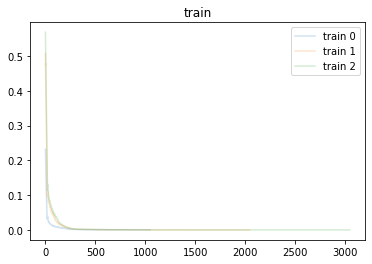

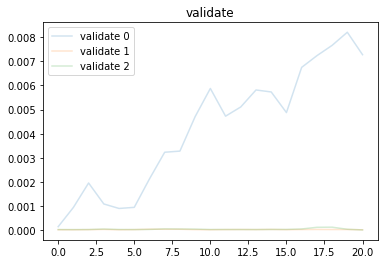

Epoch [10/50], Loss: 0.0004
Epoch [20/50], Loss: 0.0000
Epoch [30/50], Loss: 0.0000
Epoch [40/50], Loss: 0.0001
Epoch [50/50], Loss: 0.0001


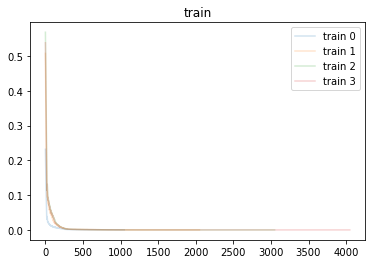

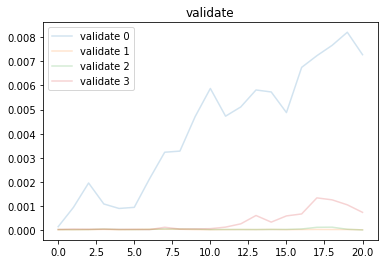

Epoch [10/50], Loss: 0.0001
Epoch [20/50], Loss: 0.0000
Epoch [30/50], Loss: 0.0000
Epoch [40/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000


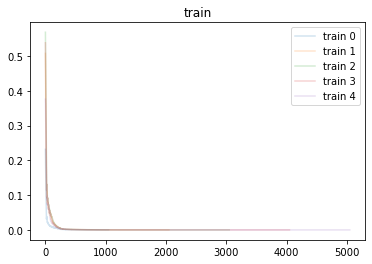

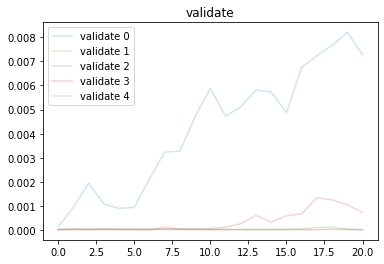

In [16]:
losses = []
losses_after = []
# Training loop

# N split cross validation
for idx, (train_index, test_index) in enumerate(tqdm.tqdm_notebook(tscv.split(X))):
    
    model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size)
    model.to(device)

    # https://discuss.pytorch.org/t/how-to-implement-weighted-mean-square-error/2547/6
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert to DataLoader for easy batching
    train_data = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

    for epoch in tqdm.tqdm_notebook(range(num_epochs), leave=False):
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # Backward and optimize
            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_after = criterion(outputs, batch_y)
            losses_after.append([loss_after.item(), 0, idx])
            losses.append([loss.item(), 0, idx])

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    model.eval()
    with torch.no_grad():
        test_data = torch.utils.data.TensorDataset(X_test, y_test)
        test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

        predictions = []
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            # predictions.extend(outputs.cpu().numpy())
            loss = criterion(outputs, batch_y)
#             print(loss.item())
            losses.append([loss.item(), 1,idx])

    model.train()

    for iidx in range(idx+1):
        plt.plot(list(map(lambda x: x[0],filter(lambda x: (x[2]==iidx) &(x[1]==0), losses) )),
                 label=f'train {iidx}', alpha=0.2)
    plt.legend()
    plt.title(f'train')
    plt.show()

    for iidx in range(idx+1):
        plt.plot(list(map(lambda x: x[0],filter(lambda x: (x[2]==iidx) &(x[1]==1), losses) )),
                    label=f'validate {iidx}', alpha=0.2)
    plt.legend()
    plt.title(f'validate')
    plt.show()
#     break


In [17]:
losses_1 = list(filter(lambda x: x[1]==0,losses))
losses_1 = np.array(losses_1)

In [18]:
len(losses_after)

15250

In [19]:
losses_after = np.array(losses_after)

In [20]:
np.sum(losses_1[::,0] - losses_after[::,0])

0.0

In [87]:
for batch_X, batch_y in test_loader:
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    outputs = model(batch_X)
    # predictions.extend(outputs.cpu().numpy())
    loss = criterion(outputs, batch_y)
    break
#             print(loss.item())

#     losses.append([loss.item(), 1,idx])

In [88]:
outputs.shape

torch.Size([256, 1])

In [158]:
local_loss = []
for idx in range(63):
    local_loss.append([batch_y[idx].to('cpu').reshape((-1,)).detach().numpy()[0], outputs[idx].to('cpu').detach().numpy()[0]])

In [159]:
u = np.array(local_loss)
_yhat = u[::,0]
_y = u[::,1]

In [160]:
loss

tensor(0.1520, device='cuda:0')

In [161]:
((_yhat-_y)**2).mean()

0.15195942

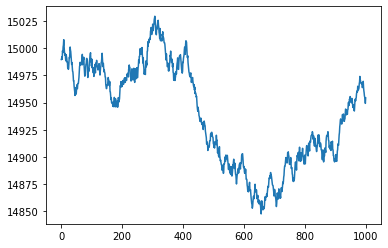

In [93]:
plt.plot(df['close'].values[:1000])

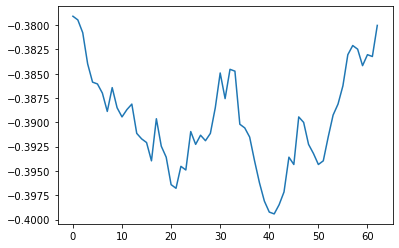

In [162]:
plt.plot(_yhat-_y)
plt.show()

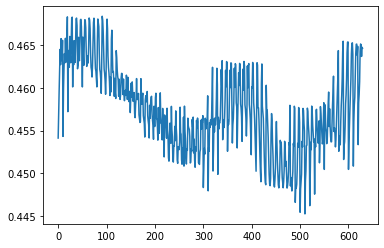

In [26]:
plt.plot(outputs.reshape((-1,)).to('cpu').detach().numpy())

In [45]:
outputs.shape

torch.Size([63, 10, 1])

In [50]:
np.mean(outputs.item(), axis=1)

ValueError: only one element tensors can be converted to Python scalars

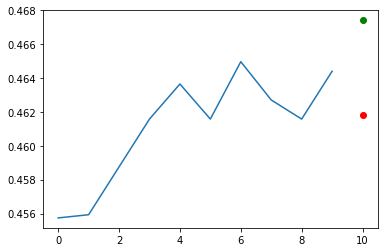

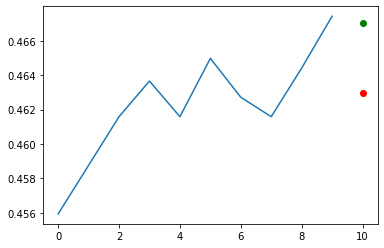

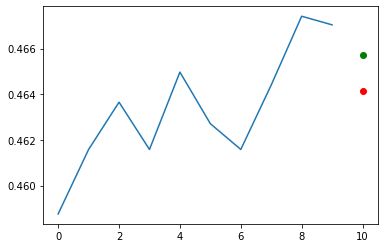

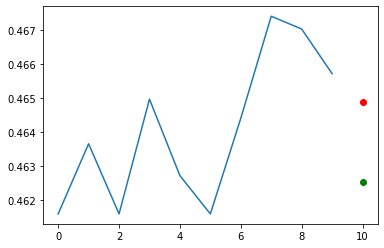

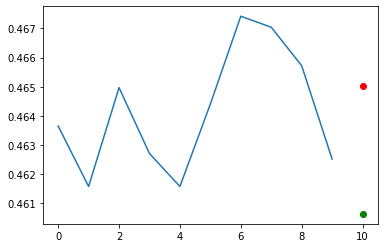

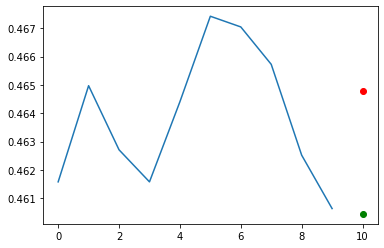

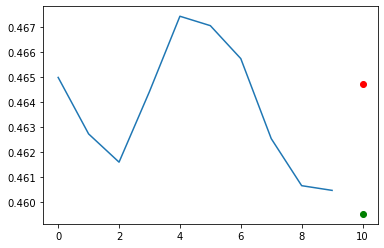

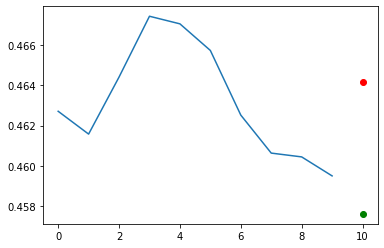

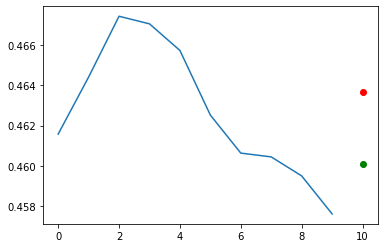

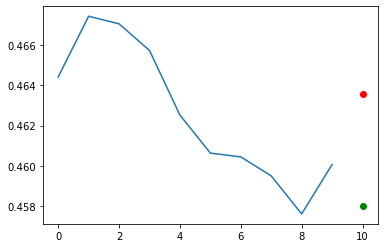

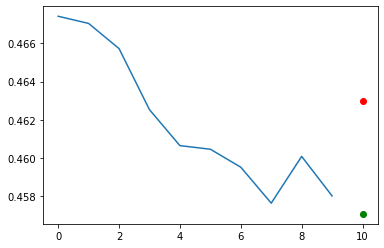

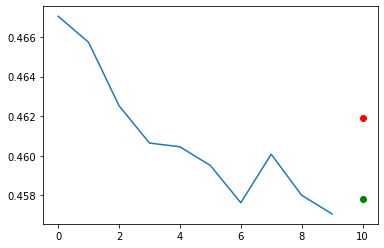

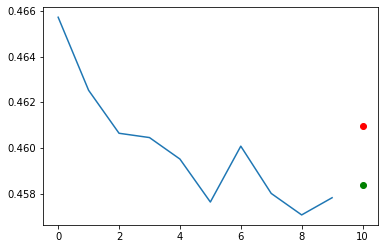

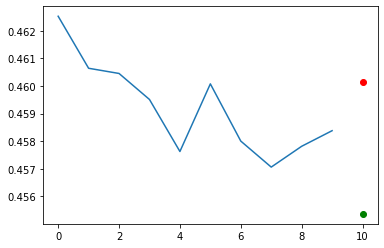

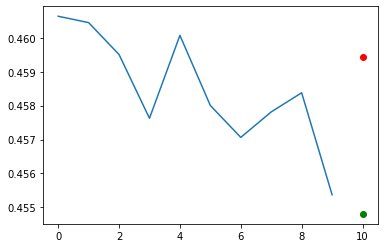

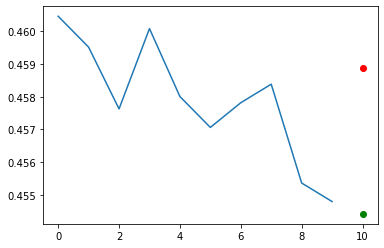

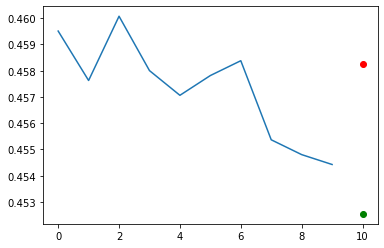

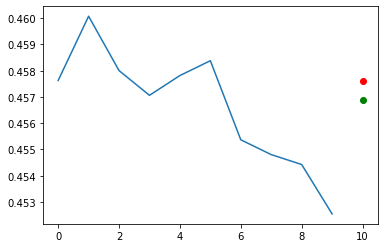

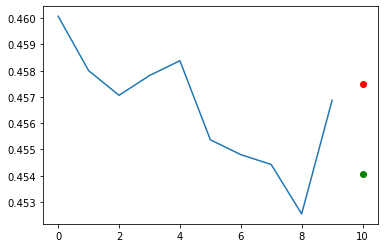

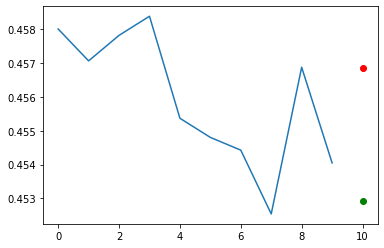

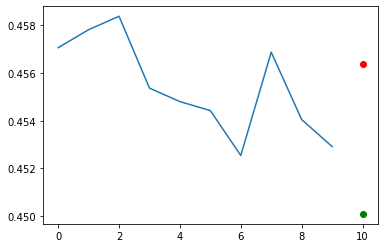

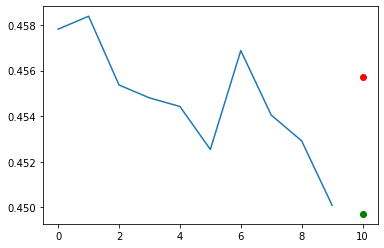

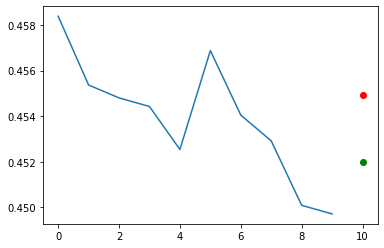

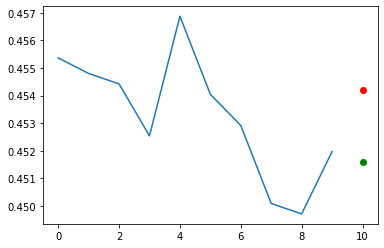

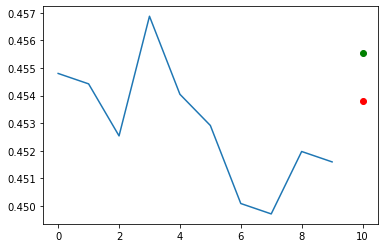

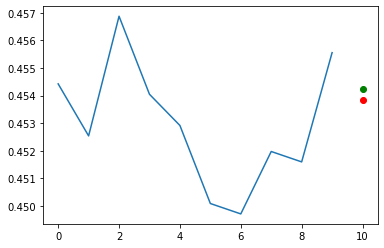

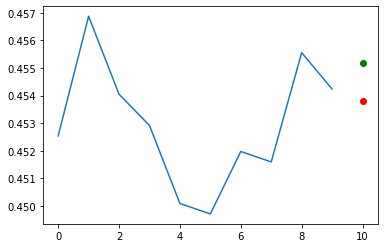

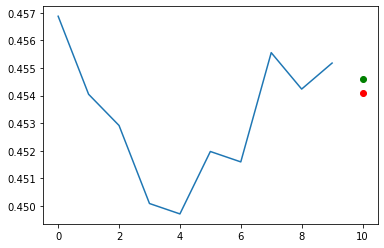

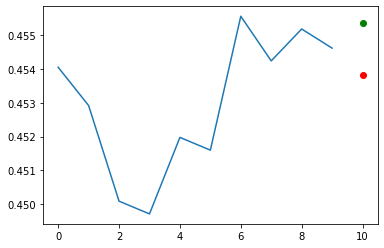

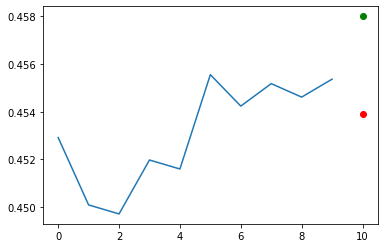

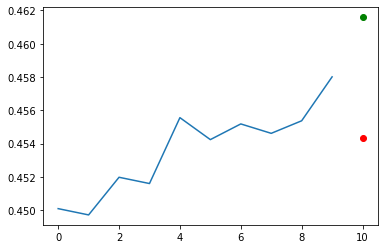

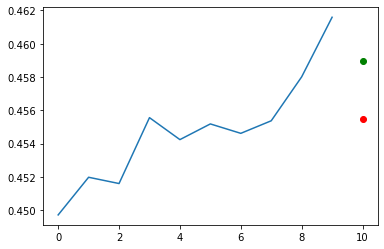

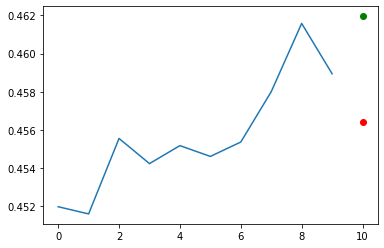

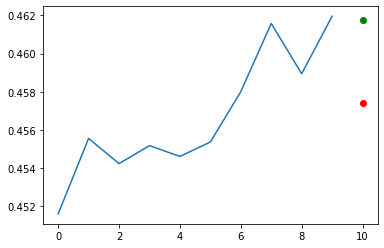

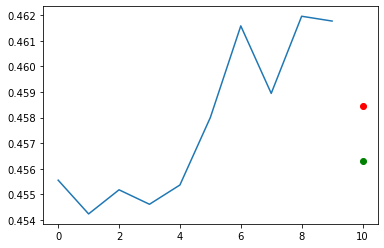

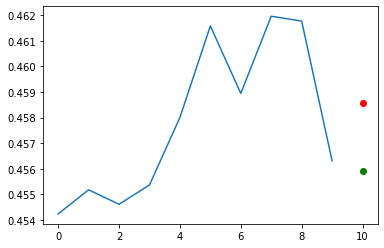

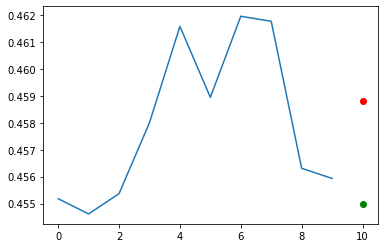

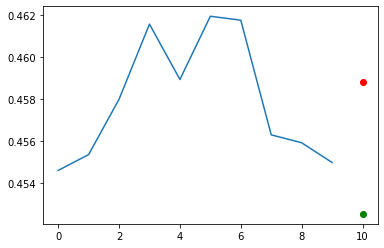

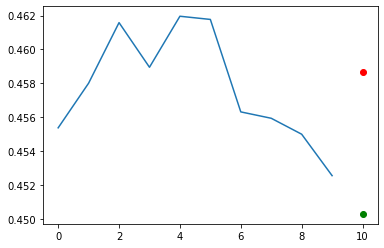

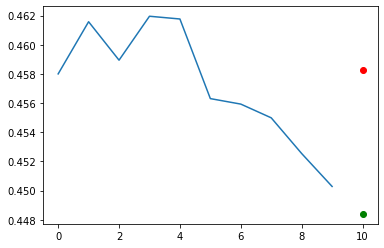

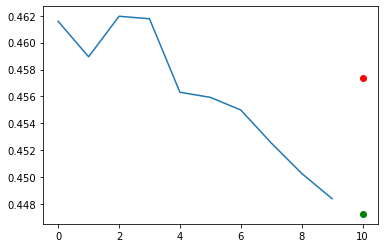

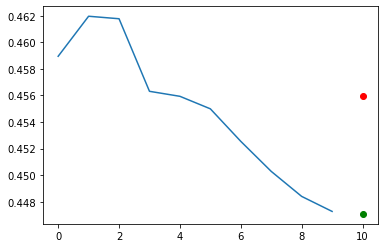

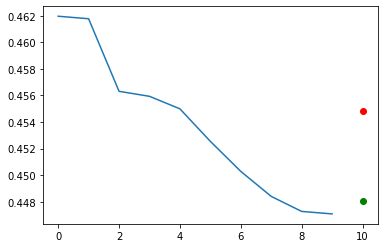

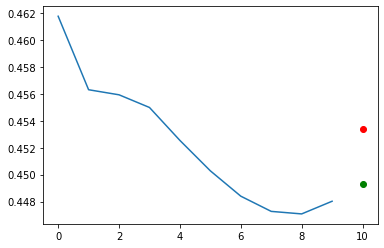

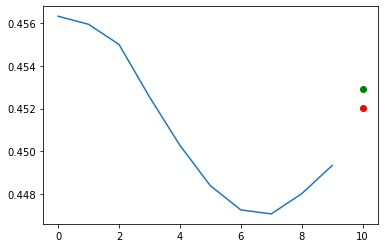

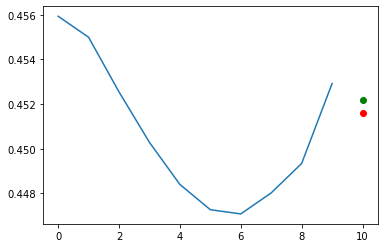

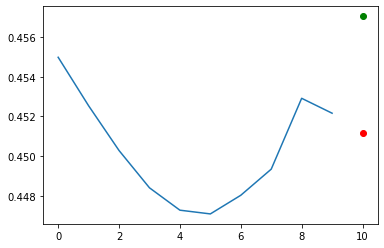

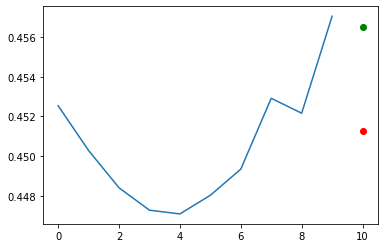

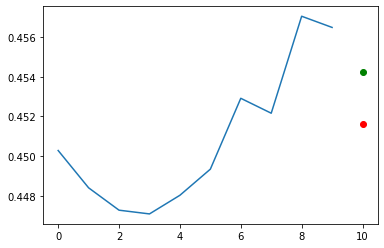

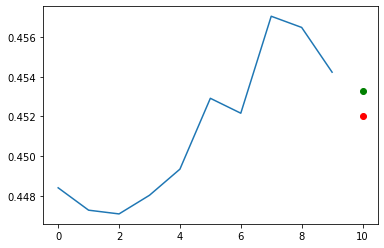

In [21]:
for idx in range(50):
    plt.plot(batch_X[idx].to('cpu').reshape((-1,)))
    plt.scatter(10,batch_y[idx].to('cpu').reshape((-1,)), color='green')
    plt.scatter(10, np.mean(outputs[idx].to('cpu').detach().numpy().reshape((-1,))), color='red')
    plt.show()

In [45]:
loss

tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward>)

In [30]:
list(range(1))

[0]

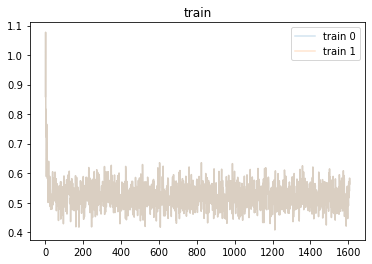

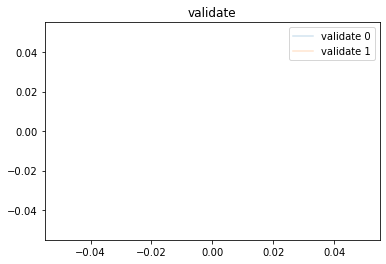

In [28]:
for iidx in range(idx+1):
    plt.plot(list(map(lambda x: x[0],filter(lambda x: (x[2]==idx) &(x[1]==0), losses) )),
             label=f'train {iidx}', alpha=0.2)
plt.legend()
plt.title(f'train')
plt.show()

for iidx in range(idx+1):
    plt.plot(list(map(lambda x: x[0],filter(lambda x: (x[2]==idx) &(x[1]==1), losses) )),
             label=f'validate {iidx}', alpha=0.2)
plt.legend()
plt.title(f'validate')
plt.show()

In [21]:
?filter

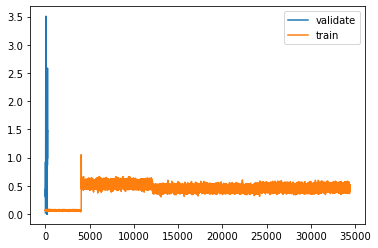

In [15]:
# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
y_test = y_test.reshape((-1,1))

In [16]:
predictions

array([[14936.91 ],
       [14936.902],
       [14936.916],
       ...,
       [14940.347],
       [14940.351],
       [14940.35 ]], dtype=float32)

In [17]:
y_test

array([[14296.25],
       [14302.  ],
       [14303.75],
       ...,
       [14756.  ],
       [14755.75],
       [14760.  ]], dtype=float32)

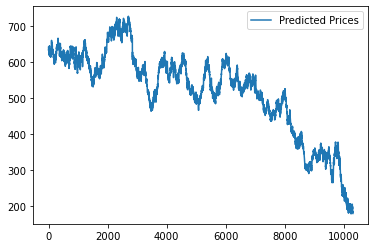

In [18]:
plt.plot((predictions - y_test).reshape((-1,)), label='Predicted Prices')
plt.legend()
plt.show()

Mean Squared Error on Test Data: 282789.2500


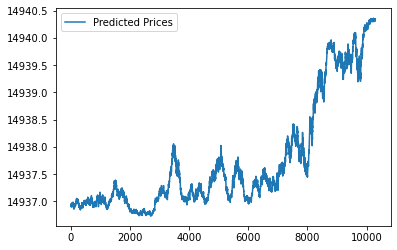

In [22]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {mse:.4f}')

# Plot the results
# plt.plot(y_test.reshape((-1,)), label='True Prices')
plt.plot(predictions.reshape((-1,)), label='Predicted Prices')
plt.legend()
plt.show()

Mean Squared Error on Test Data: 282789.2500


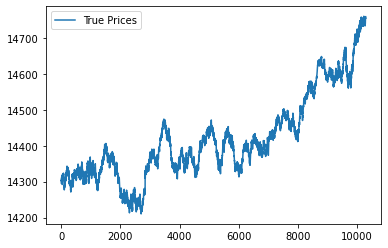

In [20]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {mse:.4f}')

# Plot the results
plt.plot(y_test.reshape((-1,)), label='True Prices')
# plt.plot(predictions.reshape((-1,)), label='Predicted Prices')
plt.legend()
plt.show()